In [6]:
#import the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [8]:
#read the csv file
data=pd.read_csv('data.csv')
print(data)

       vehicle_id  year        make               model  \
0           26587  1984  Alfa Romeo           GT V6 2.5   
1           27705  1984  Alfa Romeo           GT V6 2.5   
2           26561  1984  Alfa Romeo  Spider Veloce 2000   
3           27681  1984  Alfa Romeo  Spider Veloce 2000   
4           27550  1984  AM General   DJ Po Vehicle 2WD   
...           ...   ...         ...                 ...   
38108       37564  2017       Volvo            XC60 FWD   
38109       37547  2017       Volvo            XC90 AWD   
38110       37548  2017       Volvo            XC90 AWD   
38111       37703  2017       Volvo       XC90 AWD PHEV   
38112       37687  2017       Volvo            XC90 FWD   

                                    class              drive  \
0                        Minicompact Cars                NaN   
1                        Minicompact Cars                NaN   
2                             Two Seaters                NaN   
3                             Two S

C:\Users\lsrin\AppData\Local\Temp\ipykernel_11748\2847628375.py:2: DtypeWarning: Columns (7,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('data.csv')


In [10]:
#step 1 Preprocessing: main used for missing values handling 
data.head(9)

,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,...,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,range_ft2,city_range_ft2,highway_range_ft2
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
5,28426,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1880,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
6,27549,1984,AM General,FJ8c Post Office,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1831,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
7,28425,1984,AM General,FJ8c Post Office,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1881,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
8,27593,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle 4WD,4-Wheel or All-Wheel Drive,Automatic 3-Speed,NaN,1524,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [12]:
data.tail(3)
data.sample(5)

,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,...,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,range_ft2,city_range_ft2,highway_range_ft2
9323,6638,1990,Sterling,827,Compact Cars,Front-Wheel Drive,Automatic 4-Speed,CLKUP,10801,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
21298,19200,2003,Lexus,GX 470,Sport Utility Vehicle - 4WD,4-Wheel or All-Wheel Drive,Automatic 5-Speed,CLKUP,0,NaN,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
10323,8117,1991,Nissan,Truck 2WD,Small Pickup Trucks,Rear-Wheel Drive,Manual 5-Speed,NaN,38090,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
30284,30078,2011,Infiniti,M56,Midsize Cars,Rear-Wheel Drive,Automatic (S7),NaN,111,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
6759,4265,1988,Hyundai,Excel,Subcompact Cars,Front-Wheel Drive,Automatic 3-Speed,NaN,26510,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [14]:
#total no of row and colums
data.size

3087153

In [16]:
data.shape #r,c

(38113, 81)

In [18]:
data.columns

Index(['vehicle_id', 'year', 'make', 'model', 'class', 'drive', 'transmission',
       'transmission_type', 'engine_index', 'engine_descriptor',
       'engine_cylinders', 'engine_displacement', 'turbocharger',
       'supercharger', 'fuel_type', 'fuel_type_1', 'fuel_type_2',
       'city_mpg_ft1', 'unrounded_city_mpg_ft1', 'city_mpg_ft2',
       'unrounded_city_mpg_ft2', 'city_gasoline_consumption_cd',
       'city_electricity_consumption', 'city_utility_factor',
       'highway_mpg_ft1', 'unrounded_highway_mpg_ft1', 'highway_mpg_ft2',
       'unrounded_highway_mpg_ft2', 'highway_gasoline_consumption_cd',
       'highway_electricity_consumption', 'highway_utility_factor',
       'unadjusted_city_mpg_ft1', 'unadjusted_highway_mpg_ft1',
       'unadjusted_city_mpg_ft2', 'unadjusted_highway_mpg_ft2',
       'combined_mpg_ft1', 'unrounded_combined_mpg_ft1', 'combined_mpg_ft2',
       'unrounded_combined_mpg_ft2', 'combined_electricity_consumption',
       'combined_gasoline_consumption_cd

In [20]:
data.dtypes

vehicle_id             int64
year                   int64
make                  object
model                 object
class                 object
                      ...   
city_range_ft1       float64
highway_range_ft1    float64
range_ft2            float64
city_range_ft2       float64
highway_range_ft2    float64
Length: 81, dtype: object

In [22]:
a=data.isnull().sum()
#print(a)
col=dataset.columns
for x in col:
    if x.count('0')<38113:
        print(col[x])
# if len(a)<38113:
#     print(a)

NameError: name 'dataset' is not defined

In [24]:
data['range_ft2'].isnull().count()
print(data['transmission_type'].isnull().count())
print(data['engine_descriptor'].isnull().count())

38113
38113


In [28]:
#drop or mean the column based on it datatypes
data['range_ft2'].dtype
data['range_ft2']


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
38108   NaN
38109   NaN
38110   NaN
38111   NaN
38112   NaN
Name: range_ft2, Length: 38113, dtype: float64

In [32]:
# count the null values of the give dataset
print(data.count().values)
data.count().index

[38113 38113 38113 38113 38113 36924 38102 15045 38113 22693 37977 37979
  5239     0 38113 38113     0 38113 38113 38113 38113 38113 38113 38113
 38113 38113 38113 38113 38113 38113 38113 38113 38113 38113 38113 38113
 38113 38113 38113 38113 38113 38113 38113 38113   964 38113 38113 38113
 38113 38113 38113 38113 38113 38113 38113 38113 38113 38113 38113 38113
 38113 38113     0  3047     0     0 38113     0     0 38113 38113 38113
 38113 38113 38113 38113 38113 38113     0 38113 38113]


Index(['vehicle_id', 'year', 'make', 'model', 'class', 'drive', 'transmission',
       'transmission_type', 'engine_index', 'engine_descriptor',
       'engine_cylinders', 'engine_displacement', 'turbocharger',
       'supercharger', 'fuel_type', 'fuel_type_1', 'fuel_type_2',
       'city_mpg_ft1', 'unrounded_city_mpg_ft1', 'city_mpg_ft2',
       'unrounded_city_mpg_ft2', 'city_gasoline_consumption_cd',
       'city_electricity_consumption', 'city_utility_factor',
       'highway_mpg_ft1', 'unrounded_highway_mpg_ft1', 'highway_mpg_ft2',
       'unrounded_highway_mpg_ft2', 'highway_gasoline_consumption_cd',
       'highway_electricity_consumption', 'highway_utility_factor',
       'unadjusted_city_mpg_ft1', 'unadjusted_highway_mpg_ft1',
       'unadjusted_city_mpg_ft2', 'unadjusted_highway_mpg_ft2',
       'combined_mpg_ft1', 'unrounded_combined_mpg_ft1', 'combined_mpg_ft2',
       'unrounded_combined_mpg_ft2', 'combined_electricity_consumption',
       'combined_gasoline_consumption_cd

In [30]:
data.isnull().count().values

array([38113, 38113, 38113, 38113, 38113, 38113, 38113, 38113, 38113,
       38113, 38113, 38113, 38113, 38113, 38113, 38113, 38113, 38113,
       38113, 38113, 38113, 38113, 38113, 38113, 38113, 38113, 38113,
       38113, 38113, 38113, 38113, 38113, 38113, 38113, 38113, 38113,
       38113, 38113, 38113, 38113, 38113, 38113, 38113, 38113, 38113,
       38113, 38113, 38113, 38113, 38113, 38113, 38113, 38113, 38113,
       38113, 38113, 38113, 38113, 38113, 38113, 38113, 38113, 38113,
       38113, 38113, 38113, 38113, 38113, 38113, 38113, 38113, 38113,
       38113, 38113, 38113, 38113, 38113, 38113, 38113, 38113, 38113],
      dtype=int64)

In [ ]:
# columnsName=dataset.columns
# for x in columnsName:
#     if len(x)>0:
#         print(columnsName[x])
        

In [ ]:
# #feature selection using correlation Matrix
# Identify and select the most relevant features using a method such as
# Correlation Matrix or Mutual Information.


In [42]:
data[[ 'supercharger' ,'fuel_type_2', 'start_stop_technology' ,'electric_motor'
, 'manufacturer_code', 'vehicle_charger', 'alternate_charger' ,'range_ft2']].isnull().sum()

supercharger             38113
fuel_type_2              38113
start_stop_technology    38113
electric_motor           38113
manufacturer_code        38113
vehicle_charger          38113
alternate_charger        38113
range_ft2                38113
dtype: int64

In [58]:
colu=data[['supercharger' ,'fuel_type_2', 'start_stop_technology',
      'electric_motor',  'manufacturer_code' ,'vehicle_charger' ,'alternate_charger' ,'range_ft2']].isnull().sum()
c=data[['supercharger' ,'fuel_type_2', 'start_stop_technology',
      'electric_motor',  'manufacturer_code' ,'vehicle_charger' ,'alternate_charger' ,'range_ft2']]

In [82]:
data.drop(columns=c,axis=1)

,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,...,hours_to_charge_240v,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,city_range_ft2,highway_range_ft2
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38108,37564,2017,Volvo,XC60 FWD,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),NaN,90,SIDI,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
38109,37547,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,52,SIDI,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
38110,37548,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,53,SIDI,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
38111,37703,2017,Volvo,XC90 AWD PHEV,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,54,SIDI; PHEV,...,3.0,0.0,29,32,30,0,0.0,0.0,13.84,13.3


In [62]:
new.columns

Index(['vehicle_id', 'year', 'make', 'model', 'class', 'drive', 'transmission',
       'transmission_type', 'engine_index', 'engine_descriptor',
       'engine_cylinders', 'engine_displacement', 'turbocharger', 'fuel_type',
       'fuel_type_1', 'city_mpg_ft1', 'unrounded_city_mpg_ft1', 'city_mpg_ft2',
       'unrounded_city_mpg_ft2', 'city_gasoline_consumption_cd',
       'city_electricity_consumption', 'city_utility_factor',
       'highway_mpg_ft1', 'unrounded_highway_mpg_ft1', 'highway_mpg_ft2',
       'unrounded_highway_mpg_ft2', 'highway_gasoline_consumption_cd',
       'highway_electricity_consumption', 'highway_utility_factor',
       'unadjusted_city_mpg_ft1', 'unadjusted_highway_mpg_ft1',
       'unadjusted_city_mpg_ft2', 'unadjusted_highway_mpg_ft2',
       'combined_mpg_ft1', 'unrounded_combined_mpg_ft1', 'combined_mpg_ft2',
       'unrounded_combined_mpg_ft2', 'combined_electricity_consumption',
       'combined_gasoline_consumption_cd', 'combined_utility_factor',
       '

In [66]:
data.columns
data.isnull().sum()

vehicle_id               0
year                     0
make                     0
model                    0
class                    0
                     ...  
city_range_ft1           0
highway_range_ft1        0
range_ft2            38113
city_range_ft2           0
highway_range_ft2        0
Length: 81, dtype: int64

In [68]:
print(new.describe())

         vehicle_id          year  engine_index  engine_cylinders  \
count  38113.000000  38113.000000  38113.000000      37977.000000   
mean   19170.638496   2000.194527   8799.389001          5.736656   
std    11134.878665     10.464573  17781.058490          1.752254   
min        1.000000   1984.000000      0.000000          2.000000   
25%     9529.000000   1991.000000      0.000000          4.000000   
50%    19058.000000   2001.000000    212.000000          6.000000   
75%    28779.000000   2009.000000   4451.000000          6.000000   
max    38542.000000   2017.000000  69102.000000         16.000000   

       engine_displacement  city_mpg_ft1  unrounded_city_mpg_ft1  \
count         37979.000000  38113.000000            38113.000000   
mean              3.317583     17.981109                4.606426   
std               1.361995      6.849728               10.113963   
min               0.000000      6.000000                0.000000   
25%               2.200000     15.0000

In [70]:
new.dtypes

vehicle_id             int64
year                   int64
make                  object
model                 object
class                 object
                      ...   
range_ft1              int64
city_range_ft1       float64
highway_range_ft1    float64
city_range_ft2       float64
highway_range_ft2    float64
Length: 73, dtype: object

In [84]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)
data=data[numerical_cols].mean()
print(data)

Index(['vehicle_id', 'year', 'engine_index', 'engine_cylinders',
       'engine_displacement', 'supercharger', 'fuel_type_2', 'city_mpg_ft1',
       'unrounded_city_mpg_ft1', 'city_mpg_ft2', 'unrounded_city_mpg_ft2',
       'city_gasoline_consumption_cd', 'city_electricity_consumption',
       'city_utility_factor', 'highway_mpg_ft1', 'unrounded_highway_mpg_ft1',
       'highway_mpg_ft2', 'unrounded_highway_mpg_ft2',
       'highway_gasoline_consumption_cd', 'highway_electricity_consumption',
       'highway_utility_factor', 'unadjusted_city_mpg_ft1',
       'unadjusted_highway_mpg_ft1', 'unadjusted_city_mpg_ft2',
       'unadjusted_highway_mpg_ft2', 'combined_mpg_ft1',
       'unrounded_combined_mpg_ft1', 'combined_mpg_ft2',
       'unrounded_combined_mpg_ft2', 'combined_electricity_consumption',
       'combined_gasoline_consumption_cd', 'combined_utility_factor',
       'annual_fuel_cost_ft1', 'annual_fuel_cost_ft2', 'save_or_spend_5_year',
       'annual_consumption_in_barrels_ft1'

In [88]:
#normalization
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:

# Step 3: Feature Selection (Correlation Matrix)
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Select features with low correlation redundancy
correlation_threshold = 0.9
selected_features = [column for column in correlation_matrix.columns 
                     if all(abs(correlation_matrix[column]) < correlation_threshold)]
feature_selected_data = data[selected_features]

# Step 4: Dimensionality Reduction (PCA)
pca = PCA(n_components=3)
pca_data = pca.fit_transform(data[numerical_cols])

# Step 5: Clustering
# Define a function to perform clustering and evaluate
def kmeans_clustering(data, n_clusters=3):
    start_time = time.time()
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    end_time = time.time()
    
    # Evaluate clustering
    silhouette_avg = silhouette_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    return labels, silhouette_avg, davies_bouldin, end_time - start_time

# Clustering on original data
labels_original, sil_original, db_original, time_original = kmeans_clustering(data[numerical_cols])

# Clustering on feature-selected data
labels_selected, sil_selected, db_selected, time_selected = kmeans_clustering(feature_selected_data)

# Clustering on PCA-reduced data
labels_pca, sil_pca, db_pca, time_pca = kmeans_clustering(pca_data)

# Step 6: Visualization and Evaluation
# Plot PCA data with clustering labels
fig = plt.figure(figsize=(16, 5))

# Original Data Clustering
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=labels_original, cmap='viridis', s=50)
ax1.set_title("Clustering: Original Data")

# Feature-Selected Data Clustering
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=labels_selected, cmap='viridis', s=50)
ax2.set_title("Clustering: Feature-Selected Data")

# PCA-Reduced Data Clustering
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=labels_pca, cmap='viridis', s=50)
ax3.set_title("Clustering: PCA-Reduced Data")

plt.show()

# Summary Table
summary = pd.DataFrame({
    "Scenario": ["Original Data", "Feature-Selected Data", "PCA-Reduced Data"],
    "Silhouette Score": [sil_original, sil_selected, sil_pca],
    "Davies-Bouldin Index": [db_original, db_selected, db_pca],
    "Time (seconds)": [time_original, time_selected, time_pca]
})

print(summary)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt
import time


In [92]:

file_path = "data.csv"
data = pd.read_csv(file_path)

columns_with_all_missing = data.columns[data.isnull().all()]

data = data.drop(columns_with_all_missing, axis=1)


imputer = SimpleImputer(strategy='mean')
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])


scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print(f"Columns removed due to all missing values: {columns_with_all_missing}")


C:\Users\lsrin\AppData\Local\Temp\ipykernel_11748\3331426139.py:2: DtypeWarning: Columns (7,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Columns removed due to all missing values: Index(['supercharger', 'fuel_type_2', 'start_stop_technology',
       'electric_motor', 'manufacturer_code', 'vehicle_charger',
       'alternate_charger', 'range_ft2'],
      dtype='object')


In [94]:
# Standardize the dataset
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

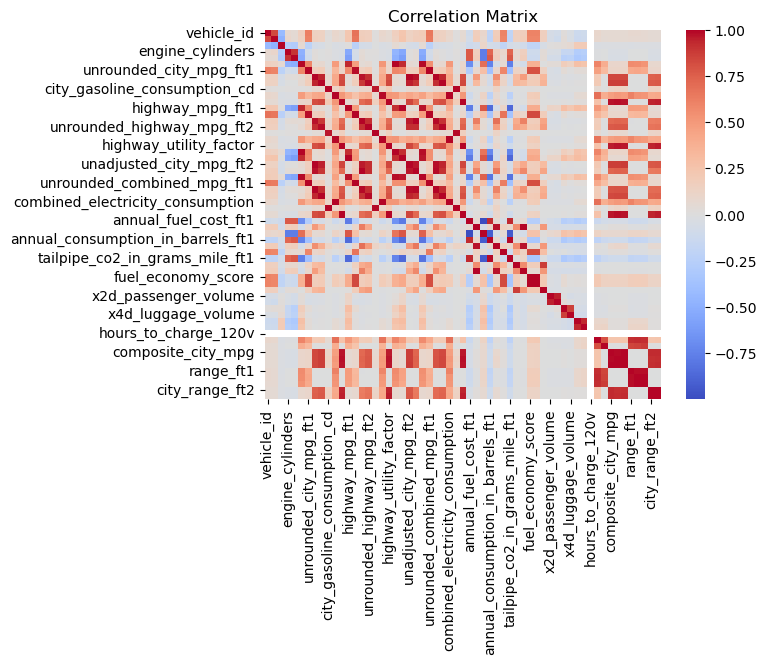

AttributeError: module 'matplotlib.pyplot' has no attribute 'fig'

In [100]:
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
plt.fig(12,9)


In [102]:
correlation_threshold = 0.9
selected_features = [column for column in correlation_matrix.columns 
                     if all(abs(correlation_matrix[column]) < correlation_threshold)]
feature_selected_data = data[selected_features]

In [90]:


pca = PCA(n_components=3)
pca_data = pca.fit_transform(data[numerical_cols])

# Step 5: Clustering
# Define a function to perform clustering and evaluate
def kmeans_clustering(data, n_clusters=3):
    start_time = time.time()
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    end_time = time.time()
    
    
    silhouette_avg = silhouette_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    return labels, silhouette_avg, davies_bouldin, end_time - start_time


labels_original, sil_original, db_original, time_original = kmeans_clustering(data[numerical_cols])


labels_selected, sil_selected, db_selected, time_selected = kmeans_clustering(feature_selected_data)


labels_pca, sil_pca, db_pca, time_pca = kmeans_clustering(pca_data)


fig = plt.figure(figsize=(16, 5))

# Original Data Clustering
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=labels_original, cmap='viridis', s=50)
ax1.set_title("Clustering: Original Data")

# Feature-Selected Data Clustering
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=labels_selected, cmap='viridis', s=50)
ax2.set_title("Clustering: Feature-Selected Data")

# PCA-Reduced Data Clustering
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=labels_pca, cmap='viridis', s=50)
ax3.set_title("Clustering: PCA-Reduced Data")

plt.show()


summary = pd.DataFrame({
    "Scenario": ["Original Data", "Feature-Selected Data", "PCA-Reduced Data"],
    "Silhouette Score": [sil_original, sil_selected, sil_pca],
    "Davies-Bouldin Index": [db_original, db_selected, db_pca],
    "Time (seconds)": [time_original, time_selected, time_pca]
})

print(summary)


C:\Users\lsrin\AppData\Local\Temp\ipykernel_11748\1485171013.py:15: DtypeWarning: Columns (7,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
C:\Users\lsrin\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['supercharger' 'fuel_type_2' 'start_stop_technology' 'electric_motor'
 'manufacturer_code' 'vehicle_charger' 'alternate_charger' 'range_ft2']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


ValueError: Columns must be same length as key